In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
YP = pd.read_csv(r'/mnt/c/YP2.csv', header = 0, index_col=0)

In [3]:
YP

ANN9  nearest       dmp1     fgf23      sost    surface  \
ID                                                                   
0      186.0730  24.4767  216.60000  27.27630  295.8040  205.39800   
1      190.1930  24.4767  213.35900   3.83002  287.1020  189.95900   
2      107.5210  12.8820    6.65099  14.89870  267.3940    5.07021   
3      110.3220  13.8406   15.15180   5.82349  269.0710   12.18120   
4      109.8470  12.8820   13.36100  10.19660  270.3830   13.18750   
...         ...      ...        ...       ...       ...        ...   
29947   41.0544  21.3637   31.02660   5.51524   65.7695    9.11475   
29948   40.2224  29.6063   44.15850  29.08110   68.8125   -2.85685   
29949   34.7048  21.3637   32.74240   1.23430   66.1577    6.61467   
29950   42.4321  26.8884    9.67493  22.11930  102.9290    5.28183   
29951   52.2369  38.6575   30.95640  19.35990  105.1970    9.33237   

       fgf23+sost+  dmp1+sost+  
ID                              
0          294.642     377.833  
1          285.938     373.882  
2          267.081     409.709  
3          268.791     401.892  
4          270.123     397.124  
...            ...         ...  
29947      157.751     202.375  
29948      144.285     179.789  
29949      147.084     190.621  
29950      162.252     196.765  
29951      183.356     219.149  

[29952 rows x 8 columns]

In [4]:
YP_subset = YP.sample(n = 2000)

In [5]:
YP_subset_original = YP.sample(n = 2000)

In [6]:
YP_subset_UMAP = YP_subset

In [7]:
YP_subset

ANN9   nearest      dmp1     fgf23      sost    surface  \
ID                                                                  
20944  31.0088  18.91170  40.85520   1.77259   2.85298 -64.452000   
14668  27.4143  16.20300  12.25200  51.10330  25.20220 -15.088400   
7498   17.6727   8.91898  12.16300  13.67010  22.68860  -1.136830   
4778   28.1327  21.31140  10.15460  23.17050   1.42356  -2.369580   
17757  22.2204   8.89722   5.37908  10.45480  33.44500 -38.881600   
...        ...       ...       ...       ...       ...        ...   
2251   34.7526  21.44760   9.58389   5.37954  57.65380  -8.214800   
12276  25.3691  16.93760   3.12846  12.32640  15.22020 -17.762400   
15370  33.3383  16.09300  35.73650  17.16170  27.93280   2.155430   
21272  31.8772  21.05590  19.03440  28.22710   2.54789 -17.545300   
27021  31.3737  11.91040  15.57660  12.98610  11.71400   0.811541   

       fgf23+sost+  dmp1+sost+  
ID                              
20944      1.77259     41.9729  
14668    108.33700    123.3100  
7498      23.44810    185.0540  
4778      74.23600    202.7810  
17757     67.87240     92.2104  
...            ...         ...  
2251      58.09130    120.7500  
12276     12.32640     80.2483  
15370     27.67080     54.8025  
21272     28.22710     19.0344  
27021     39.41460     47.9674  

[2000 rows x 8 columns]

In [8]:
from plotly.offline import init_notebook_mode, iplot

In [9]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [10]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset)

In [12]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="YOPRO+ Dataset - PCA Explained Variance || 100% achieved at 6 components")
fig = dict(data=data, layout=layout)
iplot(fig)

In [13]:
pca = PCA(n_components=6)
skillsPCA = pca.fit_transform(YP_subset)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [15]:

X=YP_subset
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [18]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [19]:
dfskillsPCA

0          1          2          3          4          5  \
0     -94.850652 -23.005336  39.714688 -10.410659  10.366863  15.954361   
1      27.161016  40.392125   5.691234  40.832310   1.389388 -20.792698   
2      47.735131 -59.944940 -21.435491   9.839782  -2.280565   0.423168   
3      77.109927 -32.737970 -12.138408  51.431187   1.704286   5.764958   
4     -16.769888  18.047095  16.058643   5.760093 -23.435088   4.197368   
...          ...        ...        ...        ...        ...        ...   
1995   14.985299   7.711527 -12.286951 -17.410629 -13.455566   1.675846   
1996  -51.698306 -23.213050 -13.142781   0.351040  -9.322714  -1.283756   
1997  -59.378242   9.631254 -18.488768 -15.583562  24.522729   1.436294   
1998 -100.604140  17.494409  -5.852684   9.000713  13.199561  -5.778956   
1999  -66.915319  16.530904 -22.579084   5.367481   7.632955   7.745043   

      cluster  
0           3  
1           2  
2           1  
3           1  
4           2  
...       ...  
1995        2  
1996        3  
1997        3  
1998        3  
1999        3  

[2000 rows x 7 columns]

In [20]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
skillsPCA_labels

array([3, 2, 1, ..., 3, 3, 3], dtype=int32)

In [23]:
YP_subset['cluster'] = skillsPCA_labels

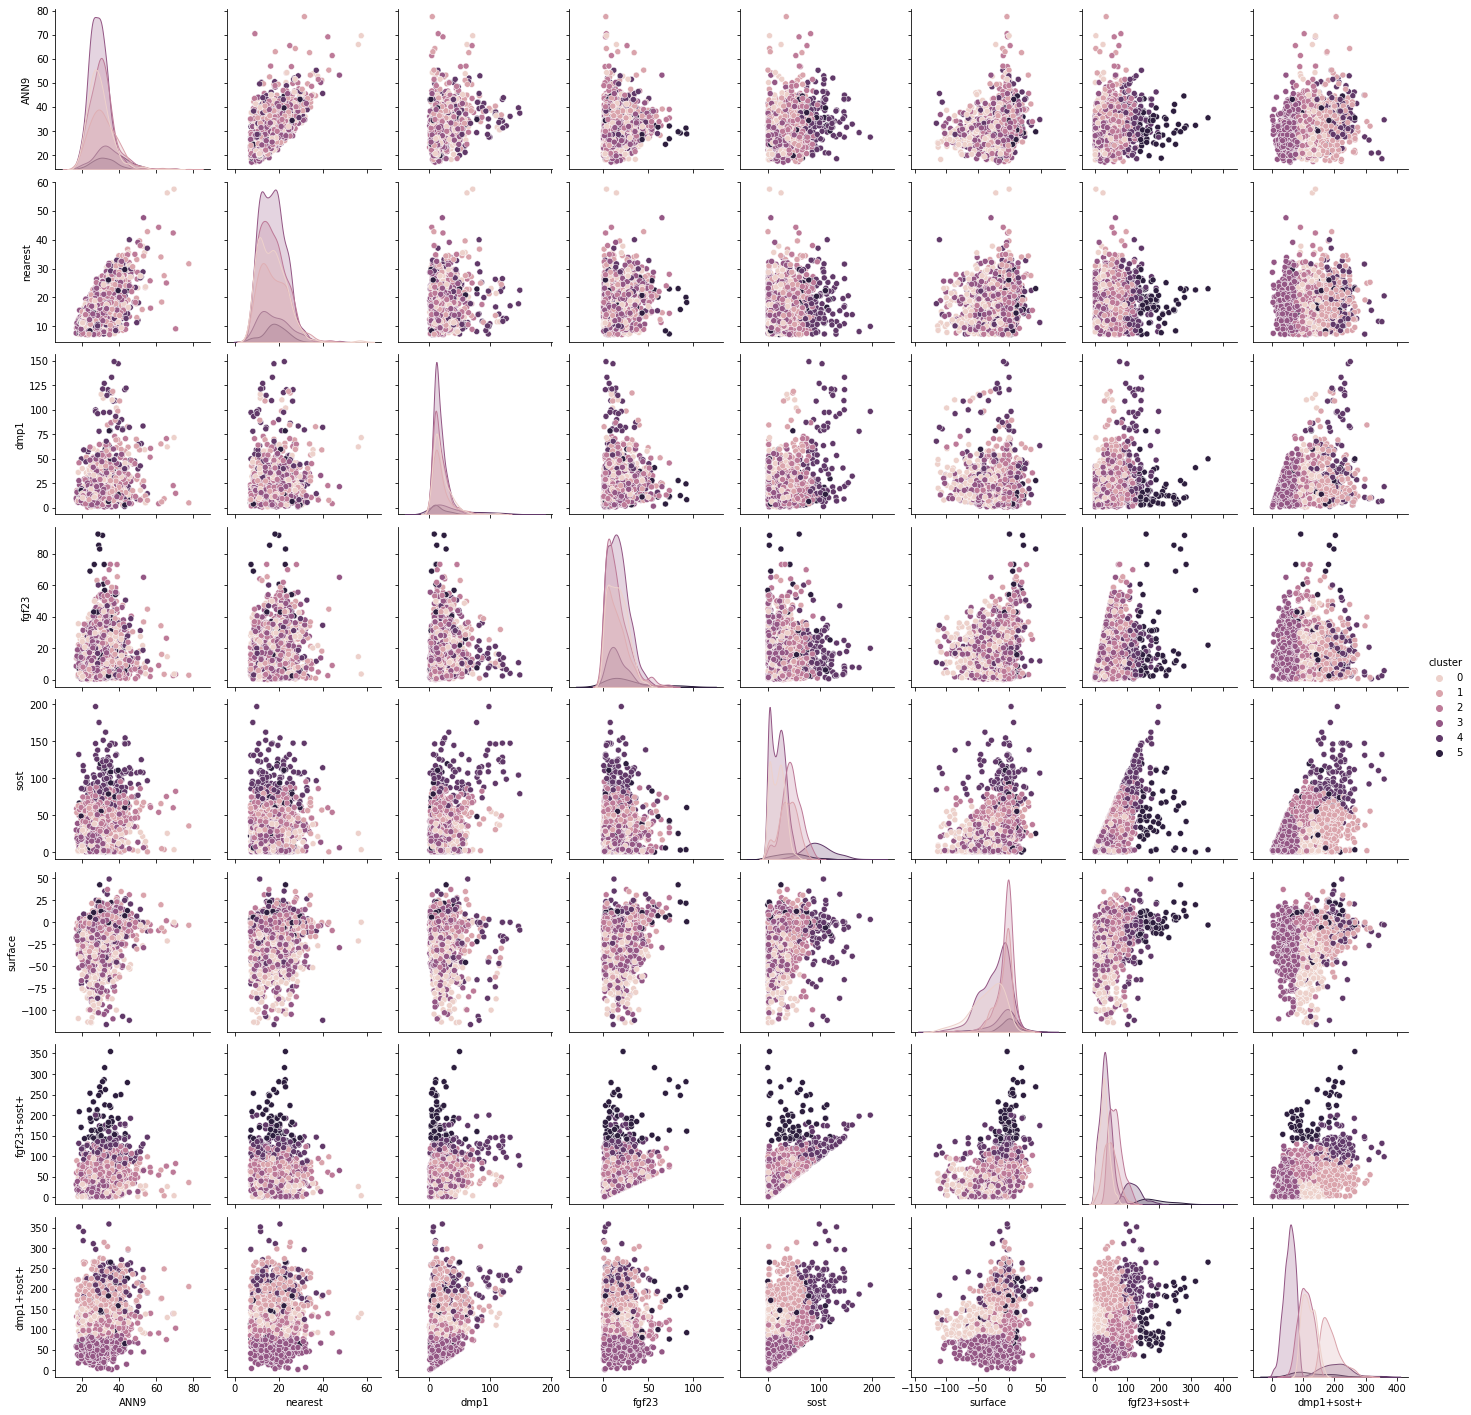

In [24]:
sns.pairplot(YP_subset, hue='cluster');

In [25]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

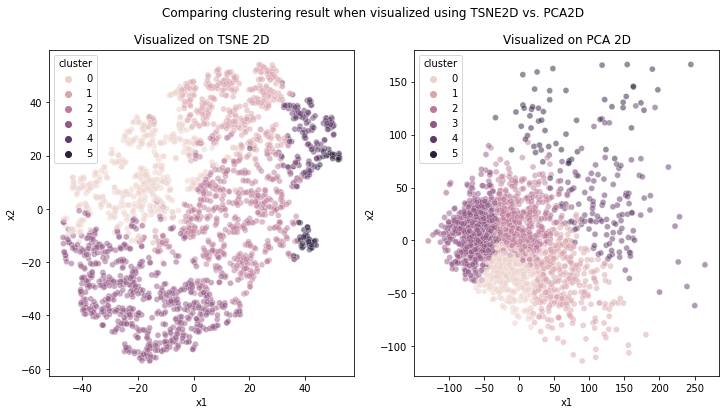

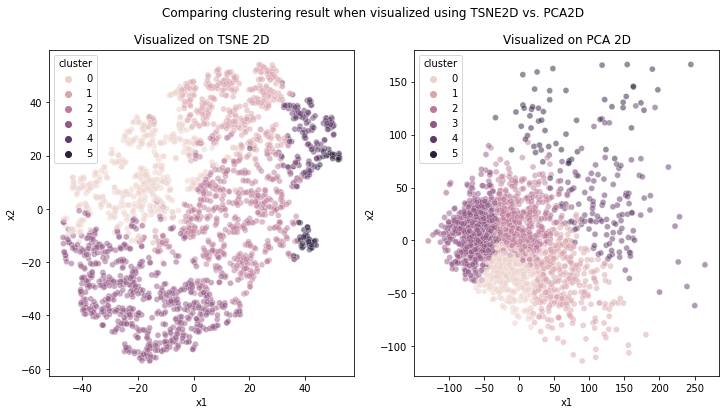

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [27]:
import umap

In [28]:
reducer = umap.UMAP()

In [29]:
YP_subset_UMAP

ANN9   nearest      dmp1     fgf23      sost    surface  \
ID                                                                  
20944  31.0088  18.91170  40.85520   1.77259   2.85298 -64.452000   
14668  27.4143  16.20300  12.25200  51.10330  25.20220 -15.088400   
7498   17.6727   8.91898  12.16300  13.67010  22.68860  -1.136830   
4778   28.1327  21.31140  10.15460  23.17050   1.42356  -2.369580   
17757  22.2204   8.89722   5.37908  10.45480  33.44500 -38.881600   
...        ...       ...       ...       ...       ...        ...   
2251   34.7526  21.44760   9.58389   5.37954  57.65380  -8.214800   
12276  25.3691  16.93760   3.12846  12.32640  15.22020 -17.762400   
15370  33.3383  16.09300  35.73650  17.16170  27.93280   2.155430   
21272  31.8772  21.05590  19.03440  28.22710   2.54789 -17.545300   
27021  31.3737  11.91040  15.57660  12.98610  11.71400   0.811541   

       fgf23+sost+  dmp1+sost+  cluster  
ID                                       
20944      1.77259     41.9729        3  
14668    108.33700    123.3100        2  
7498      23.44810    185.0540        1  
4778      74.23600    202.7810        1  
17757     67.87240     92.2104        2  
...            ...         ...      ...  
2251      58.09130    120.7500        2  
12276     12.32640     80.2483        3  
15370     27.67080     54.8025        3  
21272     28.22710     19.0344        3  
27021     39.41460     47.9674        3  

[2000 rows x 9 columns]

In [30]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [31]:
data = YP_subset_UMAP[
    [
        "ANN9",
        "dmp1",
        "fgf23",
        "sost",
        'nearest',
        'surface',
        'fgf23+sost+',
        'dmp1+sost+'
    ] 
].values
scaled_data = StandardScaler().fit_transform(data)

In [32]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(2000, 2)

In [33]:
embedding

array([[10.933527 ,  8.042946 ],
       [ 6.6374435,  6.1828527],
       [10.3898325, 11.290019 ],
       ...,
       [ 8.496371 , 10.217093 ],
       [ 8.882806 ,  6.6961713],
       [ 9.366563 , 10.534066 ]], dtype=float32)

In [34]:
embedding = pd.DataFrame(embedding)
embedding['cluster'] = skillsPCA_labels

In [35]:
embedding

0          1  cluster
0     10.933527   8.042946        3
1      6.637444   6.182853        2
2     10.389832  11.290019        1
3      7.953571   9.004915        1
4     11.435532  10.978523        2
...         ...        ...      ...
1995   6.547584   9.491711        2
1996   9.863984  10.015934        3
1997   8.496371  10.217093        3
1998   8.882806   6.696171        3
1999   9.366563  10.534066        3

[2000 rows x 3 columns]

In [36]:
embedding.columns = ['x1','x2','cluster']

In [37]:
embedding

x1         x2  cluster
0     10.933527   8.042946        3
1      6.637444   6.182853        2
2     10.389832  11.290019        1
3      7.953571   9.004915        1
4     11.435532  10.978523        2
...         ...        ...      ...
1995   6.547584   9.491711        2
1996   9.863984  10.015934        3
1997   8.496371  10.217093        3
1998   8.882806   6.696171        3
1999   9.366563  10.534066        3

[2000 rows x 3 columns]

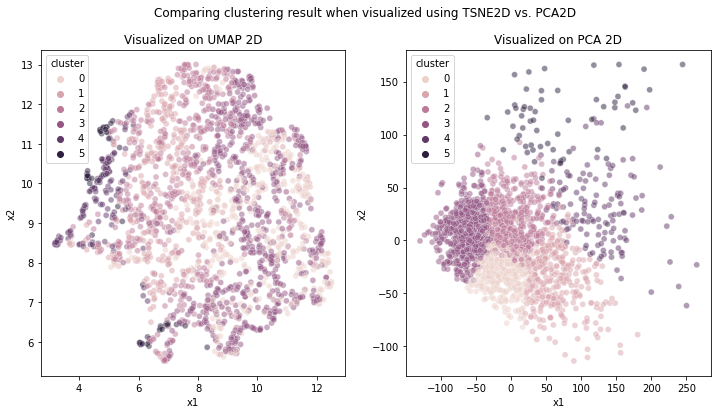

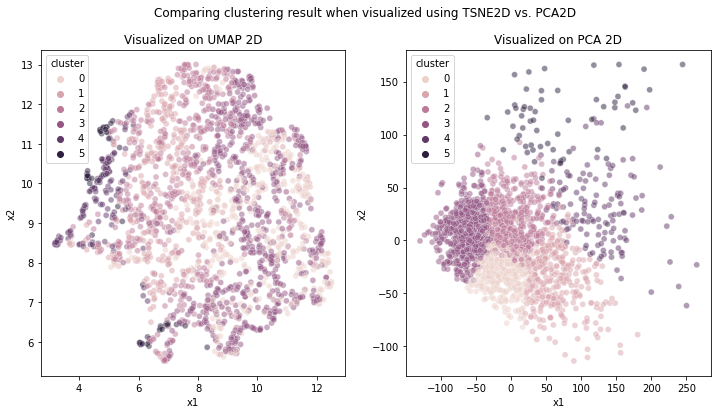

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=embedding,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on UMAP 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [39]:
YP_subset_original

ANN9  nearest      dmp1     fgf23      sost    surface  fgf23+sost+  \
ID                                                                              
13452  20.1075  10.2818  21.16330  13.52450  30.31760   0.297927     28.23680   
28322  38.1247  14.7571  27.09790  21.06940  74.73980  13.884700    173.00700   
2869   21.0500  17.5319   7.19522  16.51920  16.72280 -36.545200     17.38350   
24863  29.2858  20.7993  15.50440  10.39660  54.09360  -0.351981     55.28830   
26460  32.8053  20.7459  63.78730  17.88130  28.71890  25.437100     76.21720   
...        ...      ...       ...       ...       ...        ...          ...   
3477   28.0018  18.0410  21.77090   3.45437  16.00060 -26.291500     26.99650   
10404  37.4537  17.6989  20.57140   9.56411  26.86070 -15.090500     26.17250   
15095  35.2298  21.2573   9.15074   4.74993   5.25666  -7.122980      4.74993   
1183   33.5757  17.3671  17.19550  20.19540  91.92810   4.512210     94.16130   
8879   33.5998  23.6691   7.55268   2.25683  51.07180 -15.135400     52.16030   

       dmp1+sost+  
ID                 
13452     80.5437  
28322    230.1680  
2869      94.4193  
24863    200.6000  
26460    250.4400  
...           ...  
3477      72.3453  
10404     65.4237  
15095    210.9980  
1183     112.9840  
8879     102.9080  

[2000 rows x 8 columns]

In [40]:
import plotly.express as px

In [41]:
fig2 = px.scatter_3d(YP_subset_original, x="dmp1", y="fgf23",z="sost",
                     color="ANN9")
fig2.update_layout(title="4 Features Representation")
fig2.show()

In [42]:
dftsne

x1         x2  cluster
0    -37.902779 -29.540138        3
1     31.283983  -8.111477        2
2      9.081316  47.299549        1
3     28.516195  30.855173        1
4     -9.123993 -14.331658        2
...         ...        ...      ...
1995  20.961773   2.687240        2
1996 -21.896708 -23.510765        3
1997 -10.161750 -43.335972        3
1998 -16.736691 -48.439751        3
1999 -11.502319 -39.458992        3

[2000 rows x 3 columns]

In [43]:
YP_subset_UMAP

ANN9   nearest      dmp1     fgf23      sost    surface  \
ID                                                                  
20944  31.0088  18.91170  40.85520   1.77259   2.85298 -64.452000   
14668  27.4143  16.20300  12.25200  51.10330  25.20220 -15.088400   
7498   17.6727   8.91898  12.16300  13.67010  22.68860  -1.136830   
4778   28.1327  21.31140  10.15460  23.17050   1.42356  -2.369580   
17757  22.2204   8.89722   5.37908  10.45480  33.44500 -38.881600   
...        ...       ...       ...       ...       ...        ...   
2251   34.7526  21.44760   9.58389   5.37954  57.65380  -8.214800   
12276  25.3691  16.93760   3.12846  12.32640  15.22020 -17.762400   
15370  33.3383  16.09300  35.73650  17.16170  27.93280   2.155430   
21272  31.8772  21.05590  19.03440  28.22710   2.54789 -17.545300   
27021  31.3737  11.91040  15.57660  12.98610  11.71400   0.811541   

       fgf23+sost+  dmp1+sost+  cluster  
ID                                       
20944      1.77259     41.9729        3  
14668    108.33700    123.3100        2  
7498      23.44810    185.0540        1  
4778      74.23600    202.7810        1  
17757     67.87240     92.2104        2  
...            ...         ...      ...  
2251      58.09130    120.7500        2  
12276     12.32640     80.2483        3  
15370     27.67080     54.8025        3  
21272     28.22710     19.0344        3  
27021     39.41460     47.9674        3  

[2000 rows x 9 columns]

In [44]:
avgs_raw = YP_subset_UMAP

In [45]:
avgs_raw = avgs_raw.groupby('cluster').mean()

In [46]:
avgs_raw['surface'] = avgs_raw['surface'].abs()

In [47]:
cols = list(avgs_raw.columns.values)
cols

['ANN9',
 'nearest',
 'dmp1',
 'fgf23',
 'sost',
 'surface',
 'fgf23+sost+',
 'dmp1+sost+']

In [48]:
avgs_raw_new = avgs_raw.reindex(columns=['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'sost','fgf23+sost+','dmp1+sost+'])

<AxesSubplot:xlabel='cluster'>

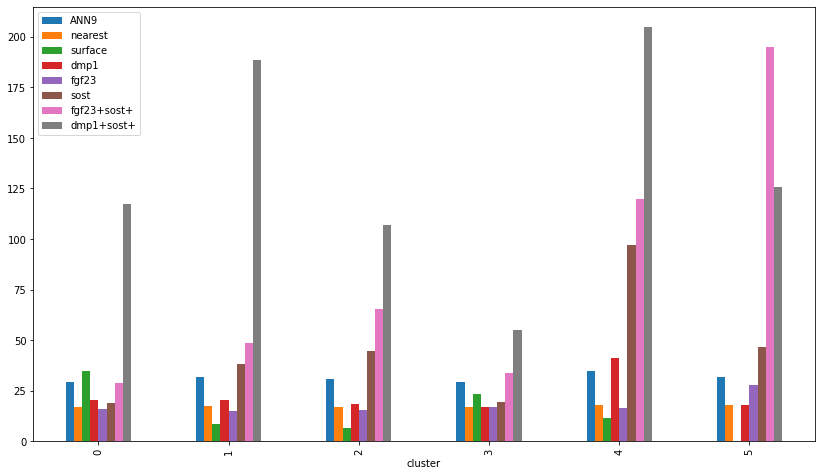

In [49]:
avgs_raw_new.plot.bar(figsize = (14,8))

In [50]:
YP_subset_UMAP.cluster.value_counts()

0    711
4    696
2    333
1    221
3     39
Name: cluster, dtype: int64